In [1]:
import numpy as np

In [16]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Results or file to generate the image is given in Zenodo and can be accessed at: https://zenodo.org/record/7390871#.Y4oe7zPMJH5.
# To load the data the path should be set up.

# Result Graphene

In [11]:
path = '/Users/bangun/Dataset/Result_LiveWDD_Graphene'

In [17]:
result_pyptycho = np.memmap(path + '/result_pyptycho.raw', dtype='complex64', mode='r', shape=(5,64,65))

In [18]:
result_livewdd = np.memmap(path + '/result_lwdd.raw', dtype='complex64', mode='r', shape=(5,64,65))

## Plot Image for Infinity Dose

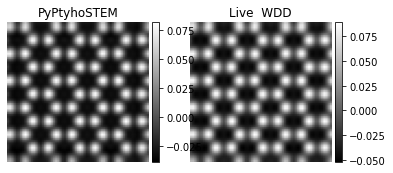

In [19]:

fig,(ax1,ax2) = plt.subplots(1,2, sharex=True, sharey=True)
#fig.tight_layout()
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
im1 = ax1.imshow(np.angle(result_pyptycho[-1]),cmap = 'gray')
im2 = ax2.imshow(np.angle(result_livewdd[-1]),cmap = 'gray')
ax1.set_axis_off()
ax1.set_title('PyPtyhoSTEM')
ax2.set_axis_off()
ax2.set_title('Live  WDD')
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')


## Plot Reconstruction for Different Doses

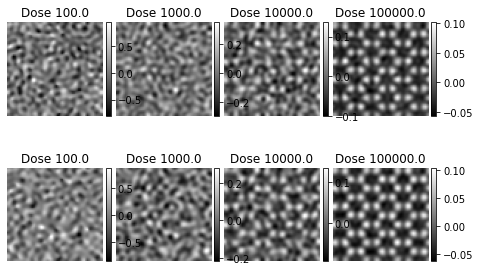

In [21]:
list_dose = [1e2,1e3,1e4,1e5, -1]
fig,ax = plt.subplots(2,len(list_dose)-1,constrained_layout=True, sharex=True, sharey=True)
 
for each_dose in range(len(list_dose)-1):
    
    # Conventional WDD
    im1 = ax[0,each_dose].imshow(np.angle(result_pyptycho[each_dose]),cmap = 'gray')
    divider = make_axes_locatable(ax[0,each_dose])
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    ax[0,each_dose].set_axis_off()
    ax[0,each_dose].set_title('Dose ' + str(list_dose[each_dose]))
    fig.colorbar(im1, cax=cax1, orientation='vertical')
    
    # Live Proc WDD
    im2 = ax[1,each_dose].imshow(np.angle(result_livewdd[each_dose]),cmap = 'gray')
    divider = make_axes_locatable(ax[1,each_dose])
    cax2 = divider.append_axes('right', size='5%', pad=0.05)
    ax[1,each_dose].set_axis_off()
    ax[1,each_dose].set_title('Dose ' + str(list_dose[each_dose]))
    fig.colorbar(im2, cax=cax2, orientation='vertical')

## Check specific Dose (10^4)

In [22]:
idx_dose = 2

In [23]:
wdd_dose = np.angle(result_pyptycho[idx_dose])
live_wdd_dose = np.angle(result_livewdd[idx_dose])
wdd_dose_inf = np.angle(result_pyptycho[-1])
live_wdd_dose_inf = np.angle(result_livewdd[-1])

In [24]:
idx_y = 32
yy = [idx_y,idx_y]
xx = [0, 64]
pyptycho=wdd_dose[idx_y,:]
lwdd = live_wdd_dose[idx_y,:]
pyptycho_inf_dose = wdd_dose_inf[idx_y,:]
lwdd_inf = live_wdd_dose_inf[idx_y,:]


In [25]:
lb = np.min((np.min((np.min(pyptycho), np.min(lwdd))), np.min((np.min(pyptycho_inf_dose), np.min(lwdd_inf)))))
ub = np.max((np.max((np.max(pyptycho),np.max(lwdd))), np.max((np.max(pyptycho_inf_dose),np.max(lwdd_inf)))))

(-0.07012726366519928, 0.13196153938770294)

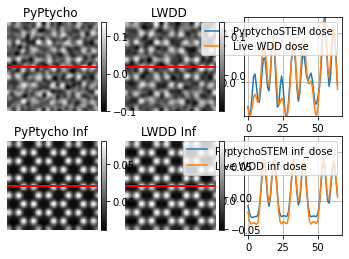

In [26]:
fig, ((ax1,ax2,ax3),
      (ax4,ax5,ax6))= plt.subplots(2,3)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
#divider3 = make_axes_locatable(ax3)
#cax3 = divider3.append_axes('right', size='5%', pad=0.05)
divider4 = make_axes_locatable(ax4)
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
divider5 = make_axes_locatable(ax5)
cax5 = divider5.append_axes('right', size='5%', pad=0.05)
#divider6 = make_axes_locatable(ax6)
#cax6 = divider6.append_axes('right', size='5%', pad=0.05)




im1 = ax1.imshow(wdd_dose, cmap = 'gray')
ax1.plot(xx,yy, color="red", linewidth=2)
ax1.set_axis_off()
ax1.set_title('PyPtycho ')
fig.colorbar(im1, cax=cax1, orientation='vertical')

im2 = ax2.imshow(live_wdd_dose, cmap = 'gray')
ax2.plot(xx,yy, color="red", linewidth=2)
ax2.set_axis_off()
ax2.set_title('LWDD ')
fig.colorbar(im2, cax=cax2, orientation='vertical')


im4 = ax4.imshow(wdd_dose_inf, cmap = 'gray')
ax4.plot(xx,yy, color="red", linewidth=2)
ax4.set_axis_off()
ax4.set_title('PyPtycho Inf ')
fig.colorbar(im4, cax=cax4, orientation='vertical')

im5 = ax5.imshow(live_wdd_dose_inf, cmap = 'gray')
ax5.plot(xx,yy, color="red", linewidth=2)
ax5.set_axis_off()
ax5.set_title('LWDD Inf ')
fig.colorbar(im5, cax=cax5, orientation='vertical')



ax3.plot(pyptycho, label= 'PyptychoSTEM dose')
ax3.plot(lwdd, label = 'Live WDD dose')
ax6.plot(pyptycho_inf_dose, label = 'PyptychoSTEM inf_dose')
ax6.plot(lwdd_inf, label = 'Live WDD inf dose')
ax3.grid(True)
ax6.grid(True)

ax3.legend()
ax6.legend()
ax3.set_ylim([lb,ub ])
ax6.set_ylim([lb,ub ])

In [27]:
xgrid = np.arange(len(pyptycho))

(-0.07012726366519928, 0.13196153938770294)

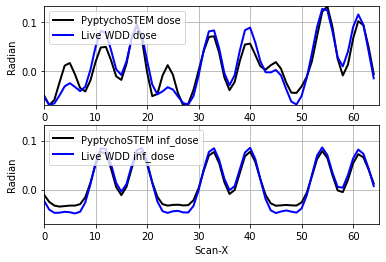

In [28]:
fig, (ax3,ax6) = plt.subplots(2,1)
ax3.plot(xgrid,pyptycho, '-k', label= 'PyptychoSTEM dose', linewidth = 2)
ax3.plot(xgrid,lwdd, '-b',label = 'Live WDD dose', linewidth = 2)
ax6.plot(xgrid,pyptycho_inf_dose, '-k', label = 'PyptychoSTEM inf_dose', linewidth = 2)
ax6.plot(xgrid,lwdd_inf, '-b', label = 'Live WDD inf_dose', linewidth = 2)
ax3.grid(True)
ax6.grid(True)

#ax3.legend()
#ax6.legend()
#ax3.set_ylim([lb,ub ])
#ax6.set_ylim([lb,ub ])
ax3.set_ylabel('Radian')
ax3.set_xlabel('Scan-X')
ax3.legend()
ax3.set_xlim([0,len(xgrid)])
ax3.set_ylim([lb,ub])


ax6.set_ylabel('Radian')
ax6.set_xlabel('Scan-X')
ax6.legend()
ax6.set_xlim([0,len(xgrid)])
ax6.set_ylim([lb,ub])